In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing and Visualizing Data
Canny Edge Detection

Found 231 image(s) in /content/drive/MyDrive/training_1
Edge detection completed and saved to /content/drive/MyDrive/output/Output_Canny Edge images


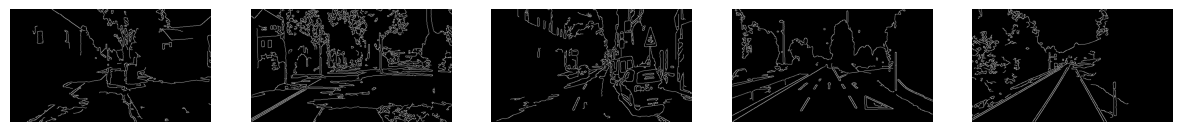

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directories containing the lane detection images
lane_detection_dir = "/content/drive/MyDrive/training_1"  # Update this path
output_dir = "/content/drive/MyDrive/output/Output_Canny Edge images"  # Update this path

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to recursively get image files in a directory and its subdirectories
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to perform Canny edge detection on an image
def canny_edge_detection(image):
    """
    Performs Canny edge detection on the given image.
    """
    # Resize image for lane detection
    resized_image = cv2.resize(image, (640, 360))  # Adjust size as needed

    # Convert the image to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    kernel_size = 5
    blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

    # Perform Canny edge detection
    low_canny_threshold = 50
    high_canny_threshold = low_canny_threshold * 3
    edges = cv2.Canny(blur, low_canny_threshold, high_canny_threshold)

    return edges

# Function to save Canny edge-detected images in the output folder
def save_canny_edge_images(input_dir, output_dir):
    image_files = get_image_files(input_dir)
    print(f"Found {len(image_files)} image(s) in {input_dir}")

    if not image_files:
        print(f"No image files found in {input_dir}")
        return

    # Initialize a counter for displaying sample images
    display_count = 0
    num_samples_to_display = 5
    sample_images = []

    for img_path in image_files:
        img = cv2.imread(img_path)
        edges = canny_edge_detection(img)

        if edges is not None:
            # Get the image file name and create the output path
            file_name = os.path.basename(img_path)
            output_path = os.path.join(output_dir, file_name)

            # Save the edge-detected image to the output directory
            cv2.imwrite(output_path, edges)

            # Collect sample images for display
            if display_count < num_samples_to_display:
                sample_images.append(edges)
                display_count += 1

    # Print only once after processing all images
    print(f"Edge detection completed and saved to {output_dir}")

    # Display 5 sample images using matplotlib
    fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 5))
    for i, sample in enumerate(sample_images):
        axes[i].imshow(sample, cmap='gray')
        axes[i].axis('off')
    plt.show()

# Save the Canny edge-detected images and display sample images
save_canny_edge_images(lane_detection_dir, output_dir)


Histogram of Oriented Gradients(HOG)

Processing complete. 231 images have been processed and saved to /content/drive/MyDrive/output/Output_HOG.


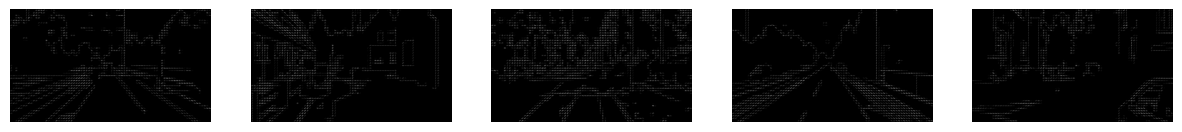

In [38]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import os
import matplotlib.pyplot as plt

# Function to compute HOG features
def compute_hog_features(image):
    hog_features, hog_image = hog(
        image,
        orientations=9,               # Number of gradient orientations
        pixels_per_cell=(8, 8),       # Size of a cell
        cells_per_block=(2, 2),       # Number of cells in each block
        block_norm='L2-Hys',          # Block normalization method
        visualize=True,               # Return the HOG image for visualization
        transform_sqrt=True           # Apply square root normalization to improve contrast
    )
    return hog_features, hog_image

# Function to process and save HOG images
def save_hog_images(input_dir, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Counter for processed images and for sample display
    processed_count = 0
    display_count = 0
    num_samples_to_display = 5
    sample_images = []

    # Iterate through all images in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read the image
            image_path = os.path.join(input_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Failed to load image: {file_name}")
                continue

            # Compute HOG features
            hog_features, hog_image = compute_hog_features(image)

            # Save the HOG image to the output directory
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
            output_path = os.path.join(output_dir, f"HOG_{file_name}")
            cv2.imwrite(output_path, (hog_image_rescaled * 255).astype(np.uint8))

            # Collect sample images for display
            if display_count < num_samples_to_display:
                sample_images.append(hog_image_rescaled)
                display_count += 1

            # Increment the counter
            processed_count += 1

    # Print completion message once
    print(f"Processing complete. {processed_count} images have been processed and saved to {output_dir}.")

    # Display 5 sample images using matplotlib
    if sample_images:
        fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 5))
        for i, sample in enumerate(sample_images):
            axes[i].imshow(sample, cmap='gray')
            axes[i].axis('off')
        plt.show()

# Define the directories
hough_output_dir = '/content/drive/MyDrive/output/Hough_transform'  # Update this path if necessary
hog_output_dir = '/content/drive/MyDrive/output/Output_HOG'  # Directory to save HOG images

# Process and save HOG images
save_hog_images(hough_output_dir, hog_output_dir)


In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directories for Canny edge-detected images and output for Hough Transform results
canny_edge_dir = "/content/drive/MyDrive/output/Canny Edge images"  # Update this path
lane_output_dir = "/content/drive/MyDrive/output/Hough_transform/lane"  # Output directory for lane images
no_lane_output_dir = "/content/drive/MyDrive/output/Hough_transform/no_lane"  # Output directory for no lane images

# Create the output directories if they don't exist
os.makedirs(lane_output_dir, exist_ok=True)
os.makedirs(no_lane_output_dir, exist_ok=True)

# Function to recursively get image files in a directory and its subdirectories
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to apply Hough Transform to detect lines
def hough_transform(edges, original_image):
    rho = 1
    theta = np.pi / 180
    threshold = 15
    min_line_length = 40
    max_line_gap = 20

    # Define the ROI
    height, width = original_image.shape[:2]
    vertices = np.array([[(0, height), (width // 2, height // 2), (width, height)]], dtype=np.int32)

    # Mask the edges image to only keep the region of interest
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, vertices, 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Perform Hough Line Transform on the masked edges
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    # Create an image to draw lines on
    hough_image = np.zeros_like(original_image)

    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(hough_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    combined_image = cv2.addWeighted(original_image, 0.8, hough_image, 1, 0)
    return combined_image

# Function to apply Hough Transform to Canny edge-detected images and save the results
def save_hough_transform_images(input_dir):
    image_files = get_image_files(input_dir)

    if not image_files:
        return

    for edge_img_path in image_files:
        edges = cv2.imread(edge_img_path, cv2.IMREAD_GRAYSCALE)
        original_img_path = edge_img_path.replace("canny_edges", "image_2")  # Assuming original images are in "image_2" folder
        original_image = cv2.imread(original_img_path)

        if edges is None or original_image is None:
            continue

        hough_image = hough_transform(edges, original_image)

        if "lane" in os.path.basename(edge_img_path).lower():
            output_path = os.path.join(lane_output_dir, os.path.basename(edge_img_path))
        else:
            output_path = os.path.join(no_lane_output_dir, os.path.basename(edge_img_path))

        cv2.imwrite(output_path, hough_image)

# Display a sample of output images
def display_sample_images(output_dir, sample_size=5):
    image_files = get_image_files(output_dir)
    sample_images = np.random.choice(image_files, min(len(image_files), sample_size), replace=False)

    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(sample_images, 1):
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, sample_size, i)
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(os.path.basename(img_path))
    plt.show()

# Save the Hough Transform images and display a sample
save_hough_transform_images(canny_edge_dir)
display_sample_images(lane_output_dir)


<Figure size 1500x1000 with 0 Axes>

Accuracy: 0.6206896551724138
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.54      0.58      0.56        24

    accuracy                           0.62        58
   macro avg       0.61      0.62      0.61        58
weighted avg       0.63      0.62      0.62        58



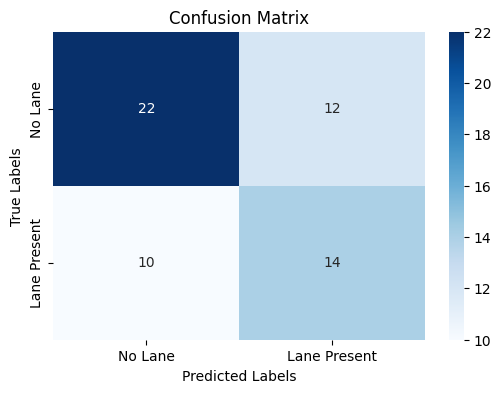


Confusion Matrix as Table:
               Predicted No Lane  Predicted Lane Present
No Lane                      22                      12
Lane Present                 10                      14


In [39]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Paths to your dataset
train_dir = '/content/drive/MyDrive/training_1'  # Training directory path
test_dir = '/content/drive/MyDrive/testing_1'    # Testing directory path

# Function to extract features from images (same as before)
def extract_features_from_images(image_dir):
    features = []
    labels = []

    for class_name in ['lane_present', 'no_lane']:
        class_dir = os.path.join(image_dir, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_dir, img_name)
                image = cv2.imread(img_path)

                # Example feature extraction (you can modify this part)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                edges = cv2.Canny(gray, 100, 200)
                num_edges = cv2.countNonZero(edges)

                features.append([num_edges])
                labels.append(0 if class_name == 'no_lane' else 1)

    return np.array(features), np.array(labels)

# Step 1: Extract features and labels
X, y = extract_features_from_images(train_dir)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a RandomForestClassifier
classifier.fit(X_train, y_train)  # Train the model

# Step 4: Save the trained model
joblib.dump(classifier, 'lane_detection_model.joblib')

# Step 5: Load the trained model
loaded_model = joblib.load('lane_detection_model.joblib')

# Step 6: Evaluate on the test dataset
X_test_full, y_test_full = extract_features_from_images(test_dir)
y_pred = loaded_model.predict(X_test_full)

# Step 7: Print evaluation results
print("Accuracy:", accuracy_score(y_test_full, y_pred))
print("Classification Report:\n", classification_report(y_test_full, y_pred))

# Step 8: Confusion matrix
conf_matrix = confusion_matrix(y_test_full, y_pred)

# Use seaborn to create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lane', 'Lane Present'], yticklabels=['No Lane', 'Lane Present'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Or print the confusion matrix as a table using pandas
conf_matrix_df = pd.DataFrame(conf_matrix, index=['No Lane', 'Lane Present'], columns=['Predicted No Lane', 'Predicted Lane Present'])
print("\nConfusion Matrix as Table:\n", conf_matrix_df)
